In [1]:
import xlrd
import pandas as pd
import numpy as np
import os
from pathlib import Path
import statistics as st 
import matplotlib.pyplot as plt

In [2]:
this_dir = Path().resolve()
chapter_dir = this_dir / "Planilhas_Livro_Mercado_Financeiro/Cap3"

In [3]:
teste = pd.read_excel(chapter_dir / "Teste.xlsx", header=None)
teste.head()

,0,1
0,1,10
1,2,-4
2,3,2
3,4,3
4,5,11


In [8]:
estat_dados = pd.read_excel(chapter_dir / "EstatDad.xlsx", header=None)
estat_dados.head()

,0,1
0,1,10
1,2,9
2,3,8
3,4,9
4,5,9


In [10]:
media = st.mean(estat_dados[1])
mediana = st.median(estat_dados[1])
desvioP = st.pstdev(estat_dados[1])
desvioA = st.stdev(estat_dados[1])

In [15]:
print(f"********** RESUMO DAS ESTATÍTICAS **********")
print(f"MÉDIA MEDIANA DESV.P DESV.A")
print(f"{media:5.2f} {mediana:5.2f} {desvioP:6.2f} {desvioA:6.2f}")

********** RESUMO DAS ESTATÍTICAS **********
MÉDIA MEDIANA DESV.P DESV.A
 9.35  9.00   1.74   1.79


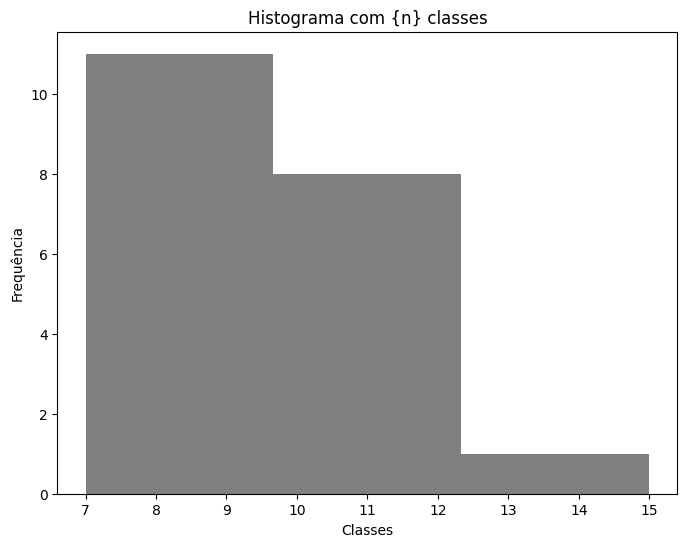

In [22]:
n = 3
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

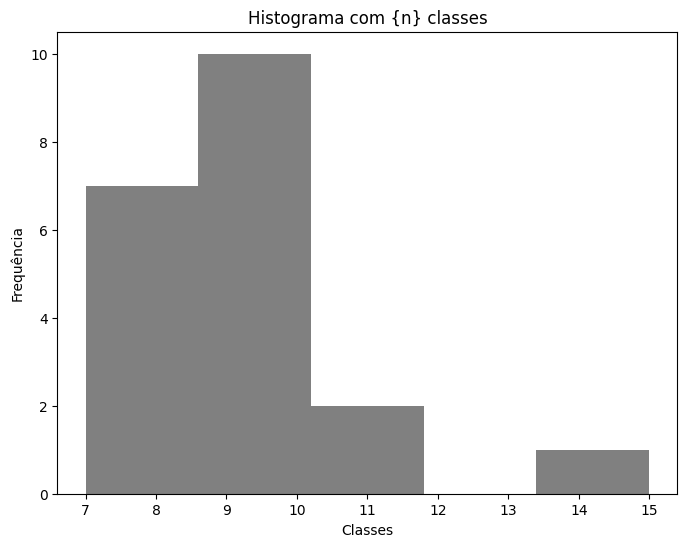

In [23]:
n = 5
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

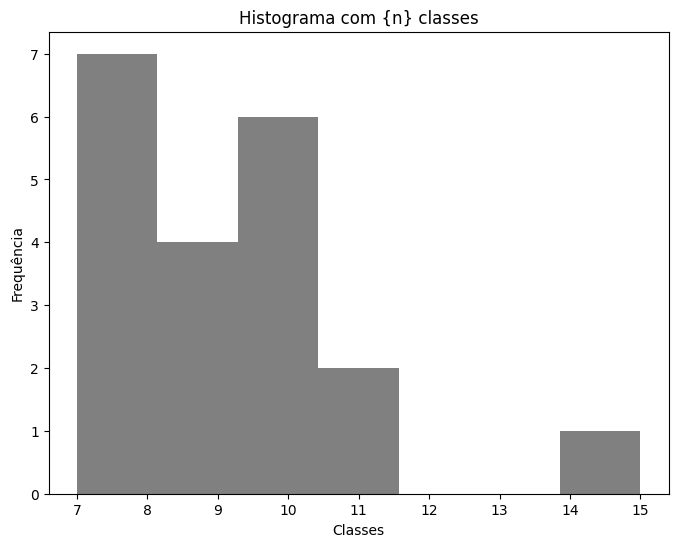

In [24]:
n = 7
plt.figure(figsize=(8,6))
plt.hist(estat_dados[1], bins=n, color="gray")
plt.xlabel("Classes")
plt.ylabel("Frequência")
plt.title("Histograma com {n} classes")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1145b5450>,
 'caps': [<matplotlib.lines.Line2D at 0x1145b56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1145b5310>],
 'medians': [<matplotlib.lines.Line2D at 0x1145b5950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1145b5a90>],
 'means': []}

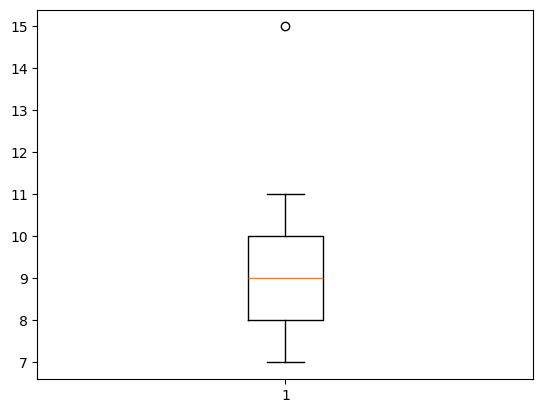

In [27]:
plt.figure()
plt.boxplot(estat_dados[1], vert=True)